In [1]:
import numpy as np
import cv2
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
%matplotlib inline


img_path = './asset/lenna.png'

<class 'numpy.ndarray'>
(512, 512, 3)


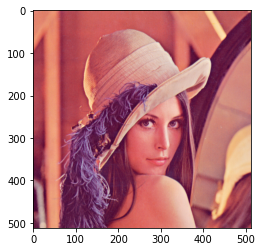

In [5]:
img = cv2.imread(img_path)

print(type(img))
print(img.shape)
plt.imshow(img[:,:,::-1])
plt.show()

In [82]:
x, y = img.shape[:2]
x_axis = np.linspace(0, x, 1024)
y_axis = np.linspace(0, y, 1024)
z_axis = np.linspace(0, 2, 3)
coord = np.array(np.meshgrid(x_axis, y_axis, z_axis, indexing='ij'))

print(coord[0].shape)
print(coord[1].shape)

(1024, 1024, 3)
(1024, 1024, 3)


(1024, 1024, 3)


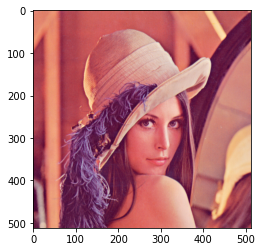

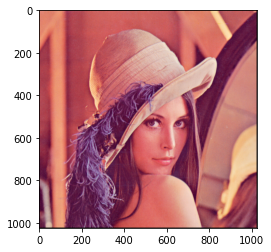

In [85]:
out = map_coordinates(img, coord)
print(out.shape)
plt.imshow(img[:,:,::-1])
plt.show()

plt.imshow(out[:,:,::-1])
plt.show()

(2, 256, 256)
(2, 65536)
(1, 65536)


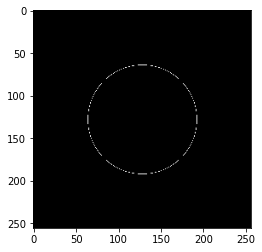

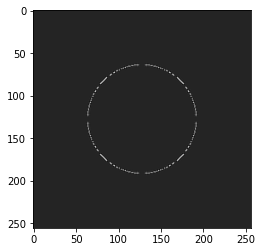

In [260]:
m = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        a = (i - 128)**2 + (j - 128)**2 
        if a < 64**2 + 30 and a > 64**2 - 30:
            m[i][j] = 1

coord = np.array(np.meshgrid(np.linspace(0, 256, 256), np.linspace(0, 256, 256), indexing='ij'))
print(coord.shape)

theta = np.radians(45)

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#     [np.cos(theta), -np.sin(theta)],
#     [np.sin(theta), np.cos(theta)],
# ]), (2, 0, 1))

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#      [1, 0],
#      [0, 1],
# ]), (2, 0, 1))
print(coord.reshape(2, -1).shape)
print(np.ones((1, 65536)).shape)
coord = np.dot(np.concatenate([coord.reshape(2, -1), np.ones((1, 65536))], axis=0).transpose(), 
    np.array([
    [1,     0,   0],
    [0,     1,   0],
    [-128., -128., 1.]]) @ \
    np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta),  0],
    [0.,            0.,         1.]
#     [1., 0., 0.],
#     [0., 1., 0.],
#     [0., 0., 1.]
    ]) \
    @ np.array([
    [1,     0,   0],
    [0,     1,   0],
    [128., 128., 1.]])
).transpose()[:2].reshape(2, 256, 256)

# coord = (coord.reshape(2, -1).transpose() @ np.array([
#     [1, -0.1],
#     [0.9, 2],
# ])).transpose().reshape(2, 256, 256)

m2 = map_coordinates(m, coord)
plt.imshow(m, cmap='gray')
plt.show()
plt.imshow(m2, cmap='gray')
plt.show(
)

(2, 256, 256)


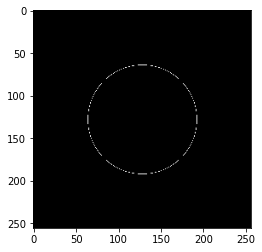

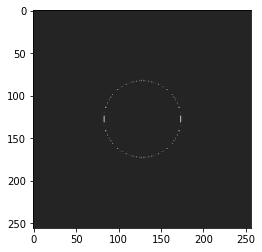

In [273]:
m = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        a = (i - 128)**2 + (j - 128)**2 
        if a < 64**2 + 30 and a > 64**2 - 30:
            m[i][j] = 1

coord = np.array(np.meshgrid(np.linspace(0, 256, 256), np.linspace(0, 256, 256), indexing='ij'))
print(coord.shape)

theta = np.radians(45)

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#     [np.cos(theta), -np.sin(theta)],
#     [np.sin(theta), np.cos(theta)],
# ]), (2, 0, 1))

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#      [1, 0],
#      [0, 1],
# ]), (2, 0, 1))
# print(coord.reshape(2, -1).shape)
# print(np.ones((1, 65536)).shape)

matrix = np.array(
    [[1,     0,   128],
     [0,     1,   128],
     [0.,    0.,  1.]]) @ np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta),  0],
    [0.,            0.,            1.]
    ]) @ np.array(
    [[1,     0,   -128],
     [0,     1,   -128],
     [0.,    0.,  1.]])

coord = (matrix @  np.concatenate([coord.reshape(-1, 2), np.ones((65536, 1))], axis=1).transpose()).transpose()[:, :2].reshape(2, 256, 256)

# coord = (coord.reshape(2, -1).transpose() @ np.array([
#     [1, -0.1],
#     [0.9, 2],
# ])).transpose().reshape(2, 256, 256)

m2 = map_coordinates(m, coord)
plt.imshow(m, cmap='gray')
plt.show()
plt.imshow(m2, cmap='gray')
plt.show(
)

(2, 256, 256)


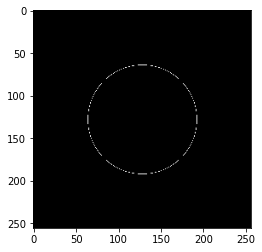

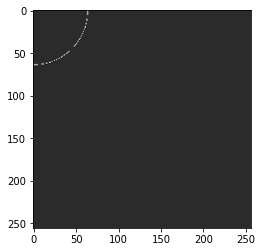

In [274]:
m = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        a = (i - 128)**2 + (j - 128)**2 
        if a < 64**2 + 30 and a > 64**2 - 30:
            m[i][j] = 1

coord = np.array(np.meshgrid(np.linspace(0, 256, 256), np.linspace(0, 256, 256), indexing='ij'))
print(coord.shape)

theta = np.radians(45)

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#     [np.cos(theta), -np.sin(theta)],
#     [np.sin(theta), np.cos(theta)],
# ]), (2, 0, 1))

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#      [1, 0],
#      [0, 1],
# ]), (2, 0, 1))
# print(coord.reshape(2, -1).shape)
# print(np.ones((1, 65536)).shape)

matrix = np.array(
    [[1,     0,   128],
     [0,     1,   128],
     [0.,    0.,  1.]])

coord = (matrix @  np.concatenate([coord.reshape(-1, 2), np.ones((65536, 1))], axis=1).transpose()).transpose()[:, :2].reshape(2, 256, 256)

# coord = (coord.reshape(2, -1).transpose() @ np.array([
#     [1, -0.1],
#     [0.9, 2],
# ])).transpose().reshape(2, 256, 256)

m2 = map_coordinates(m, coord)
plt.imshow(m, cmap='gray')
plt.show()
plt.imshow(m2, cmap='gray')
plt.show(
)

(2, 256, 256)


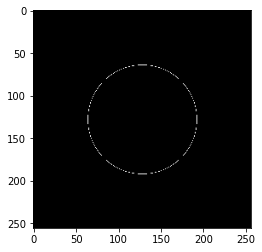

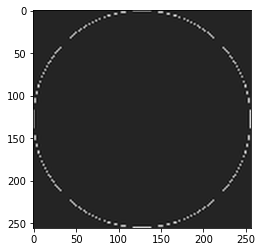

In [280]:
m = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        a = (i - 128)**2 + (j - 128)**2 
        if a < 64**2 + 30 and a > 64**2 - 30:
            m[i][j] = 1

coord = np.array(np.meshgrid(np.linspace(0, 256, 256), np.linspace(0, 256, 256), indexing='ij'))
print(coord.shape)

theta = np.radians(45)

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#     [np.cos(theta), -np.sin(theta)],
#     [np.sin(theta), np.cos(theta)],
# ]), (2, 0, 1))

# coord = np.transpose(np.transpose(coord, (1, 2, 0)) @ np.array([
#      [1, 0],
#      [0, 1],
# ]), (2, 0, 1))
# print(coord.reshape(2, -1).shape)
# print(np.ones((1, 65536)).shape)

matrix = np.array(
    [[1,     0,   128],
     [0,     1,   128],
     [0.,    0.,  1.]]) @ \
np.array(
    [[0.5,     0,   0],
     [0,     0.5,   0],
     [0.,    0.,  1.]]) @\
np.array(
    [[1,     0,   -128],
     [0,     1,   -128],
     [0.,    0.,  1.]])

coord = (matrix @  np.concatenate([coord.reshape(-1, 2), np.ones((65536, 1))], axis=1).transpose()).transpose()[:, :2].reshape(2, 256, 256)

# coord = (coord.reshape(2, -1).transpose() @ np.array([
#     [1, -0.1],
#     [0.9, 2],
# ])).transpose().reshape(2, 256, 256)

m2 = map_coordinates(m, coord)
plt.imshow(m, cmap='gray')
plt.show()
plt.imshow(m2, cmap='gray')
plt.show(
)

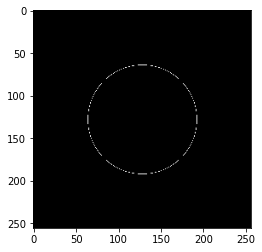

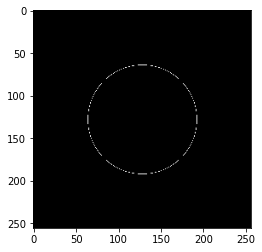

In [198]:
from scipy.ndimage import affine_transform


m = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        a = (i - 128)**2 + (j - 128)**2 
        if a < 64**2 + 30 and a > 64**2 - 30:
            m[i][j] = 1


plt.imshow(m, cmap='gray')
plt.show()

theta = np.radians(30)
# plt.imshow(affine_transform(m, np.array([[np.cos(theta), np.sin(theta)],
#                                          [-np.sin(theta), np.cos(theta)]])), cmap='gray')
plt.imshow(affine_transform(m, np.array([[1, 0],
                                         [0, 1]])), cmap='gray')
plt.show()

In [208]:
a = np.random.rand(2, 16)

print(a.shape)
print(np.concatenate([a, np.ones((1, 16))], axis=0))
print(np.concatenate([a, np.ones((1, 16))], axis=0)[:2])

(2, 16)
[[0.59122435 0.99223226 0.24695704 0.28128105 0.9549784  0.16385539
  0.19421116 0.79497259 0.91910236 0.28841291 0.26711099 0.96586838
  0.5917378  0.44311833 0.2476443  0.64092145]
 [0.80436037 0.6993557  0.88770004 0.66492157 0.63669716 0.47670669
  0.84860185 0.43668455 0.43094507 0.66286681 0.10993991 0.97968162
  0.83768406 0.4394251  0.21796774 0.3706117 ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]]
[[0.59122435 0.99223226 0.24695704 0.28128105 0.9549784  0.16385539
  0.19421116 0.79497259 0.91910236 0.28841291 0.26711099 0.96586838
  0.5917378  0.44311833 0.2476443  0.64092145]
 [0.80436037 0.6993557  0.88770004 0.66492157 0.63669716 0.47670669
  0.84860185 0.43668455 0.43094507 0.66286681 0.10993991 0.97968162
  0.83768406 0.4394251  0.21796774 0.3706117 ]]
